<a href="https://colab.research.google.com/github/alinetleitao/alinetleitao/blob/main/winemag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **DataSet Winemag**

In [1]:
# Principais Libs
import pandas as pd
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np
from io import StringIO
import requests

In [2]:
spark = SparkSession.builder.getOrCreate()

In [3]:
spark

In [4]:
# Lendo arquivo csv
df = spark.read.csv('/content/sample_data/winemag-data-130k-v2.csv', inferSchema=True, header=True,)

In [5]:
df.columns

['_c0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [6]:
F.col("country")

Column<'country'>

In [7]:
F.expr("country")

Column<'country'>

In [8]:
# Selecionando a estrutura do dataset
df.select("_c0", "country", "description", "designation", "points", "price", "taster_name", "taster_twitter_handle", "title", "variety", "winery",
"region_1").withColumnRenamed(
    "region_1", "region"
    ).show(10)

+---+--------+--------------------+--------------------+------+-----+------------------+---------------------+--------------------+------------------+-------------------+-------------------+
|_c0| country|         description|         designation|points|price|       taster_name|taster_twitter_handle|               title|           variety|             winery|             region|
+---+--------+--------------------+--------------------+------+-----+------------------+---------------------+--------------------+------------------+-------------------+-------------------+
|  0|   Italy|Aromas include tr...|        Vulkà Bianco|    87| null|     Kerin O’Keefe|         @kerinokeefe|Nicosia 2013 Vulk...|       White Blend|            Nicosia|               Etna|
|  1|Portugal|This is ripe and ...|            Avidagos|    87| 15.0|        Roger Voss|           @vossroger|Quinta dos Avidag...|    Portuguese Red|Quinta dos Avidagos|               null|
|  2|      US|Tart and snappy, ...|          

In [9]:
df.head(5)

[Row(_c0=0, country='Italy', description="Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.", designation='Vulkà Bianco', points=87, price=None, province='Sicily & Sardinia', region_1='Etna', region_2=None, taster_name='Kerin O’Keefe', taster_twitter_handle='@kerinokeefe', title='Nicosia 2013 Vulkà Bianco  (Etna)', variety='White Blend', winery='Nicosia'),
 Row(_c0=1, country='Portugal', description="This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.", designation='Avidagos', points=87, price=15.0, province='Douro', region_1=None, region_2=None, taster_name='Roger Voss', taster_twitter_handle='@vossroger', title='Quinta dos Avidagos 2011 Avidagos Red (Douro)', variety='Portuguese Red', winer

In [73]:
print(df)

DataFrame[_c0: int, country: string, description: string, designation: string, points: int, price: double, province: string, region_1: string, region_2: string, taster_name: string, taster_twitter_handle: string, title: string, variety: string, winery: string]


In [72]:
# Classificação das Variáveis:
# "_c0" : Numérica Discreta;
# "country" : Categórica Ordinal;
# "description" : Categórica Nominal;
# "designation" : Categórica Ordinal;
# "points" : Numérica Discreta;
# "price" : Numérica Contínua;
# "taster_name" : Categórica Nominal;
# "taster_twitter_handle" : Categórica Nominal;
# "title" : Categórica Nominal;
# "variety" : Categórica Ordinal;
# "winery" : Categórica Ordinal;
# "region"  : Categórica Ordinal.

In [11]:
# df.to_parquet("/content/sample_data/winemag-data-130k-v2.parquet")

In [12]:
df_wine = pd.read_csv('/content/sample_data/winemag-data-130k-v2.csv')
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2606.0,1302.500000,752.431724,0.0,651.25,1302.5,1953.75,2605.0
points,2606.0,88.371450,2.966119,80.0,86.00,88.0,90.00,100.0
price,2441.0,37.782057,68.254802,4.0,16.00,25.0,42.00,1900.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


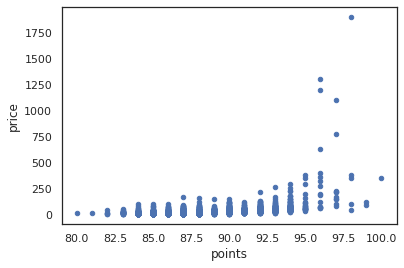

In [13]:
sns.set(style="white", color_codes=True)
%matplotlib inline

df_wine.plot(kind="scatter", x="points", y="price")

In [14]:
value_counts = df_wine["variety"].value_counts()
value_counts.head()

Pinot Noir                  221
Chardonnay                  216
Cabernet Sauvignon          196
Red Blend                   183
Bordeaux-style Red Blend    172
Name: variety, dtype: int64

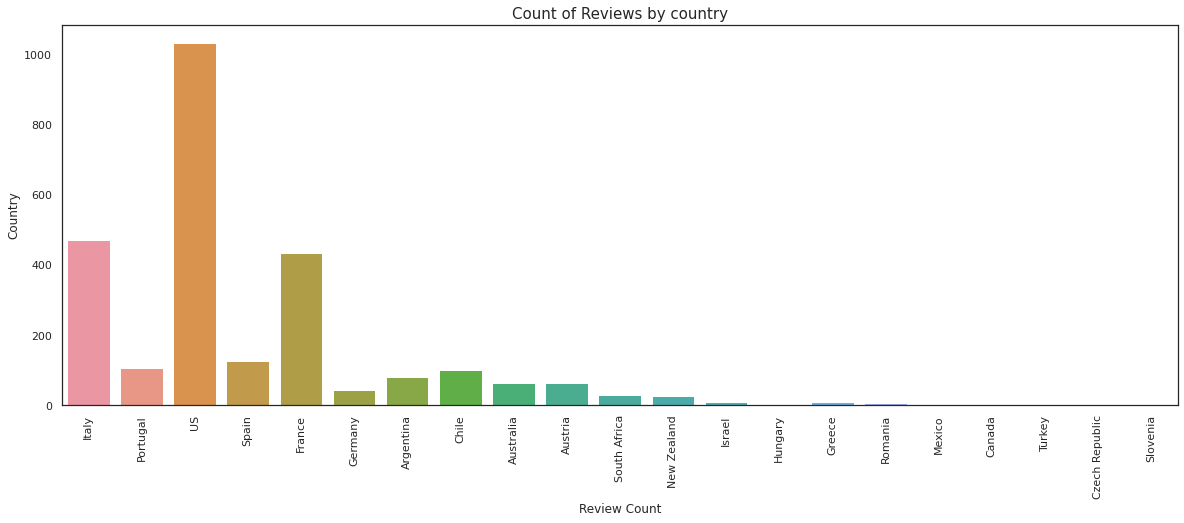

In [16]:
color = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

plt.figure(figsize=(20,7))
sns.countplot(x="country", data=df_wine)
plt.ylabel("Country",fontsize = 12)
plt.xlabel("Review Count", fontsize=12)
plt.xticks(rotation=90)
plt.title("Count of Reviews by country", fontsize=15)
plt.show()

In [17]:
ReviewCountbyCountry = pd.DataFrame(df_wine["country"].value_counts())
ReviewCountbyCountry.describe().T

,count,mean,std,min,25%,50%,75%,max
country,21.0,124.047619,245.75526,1.0,4.0,28.0,99.0,1033.0


In [18]:
country_list = ['US','Italy','France','Spain','Chile','Argentina','Portugal','Australia','New Zealand','Germany','South Africa']
sub_data1 = df_wine[df_wine['country'].isin(country_list)]

In [19]:
Bordeaux_style_redblend = sub_data1[sub_data1['variety'] == 'Bordeaux-style Red Blend']
Bordeaux_style_redblend.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,170.0,1532.141176,609.843915,67.0,1129.0,1595.5,1931.5,2585.0
points,170.0,88.894118,3.531845,83.0,87.0,88.0,91.0,98.0
price,143.0,87.720280,233.577306,9.0,18.0,30.0,53.5,1900.0


In [20]:
varietylist = ['Pinot Noir','Cabernet Sauvignon','Chardonnay','Syrah','Red Blend','Bordeaux-style Red Blend','Sauvignon Blanc','Merlot']
subdata = sub_data1[sub_data1['variety'].isin(varietylist)]

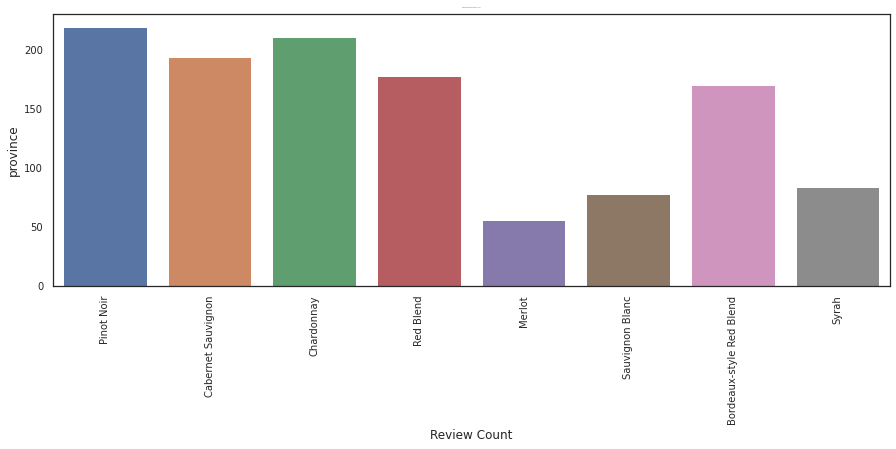

In [26]:
plt.figure(figsize=(15,5))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
sns.countplot(x="variety", data=subdata,)
plt.ylabel("province",fontsize = 12)
plt.xlabel("Review Count", fontsize=12)
plt.title("Count of Reviews by province in US", fontsize=.2)
plt.xticks(rotation=90)
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=5, max_features=200, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\w+', use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(subdata["description"])

In [30]:
#encoding the labels 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(subdata['variety'])
label_encoded_y = label_encoder.transform(subdata['variety'])
subdata['encoded_winevariety'] = label_encoded_y
subdata.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,encoded_winevariety
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,4
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,1
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,1
14,14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou,2
20,20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont,5


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=5, max_features=200, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\w+', use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(subdata["description"])

In [32]:
features = tfidf.get_feature_names()

NameError: ignored

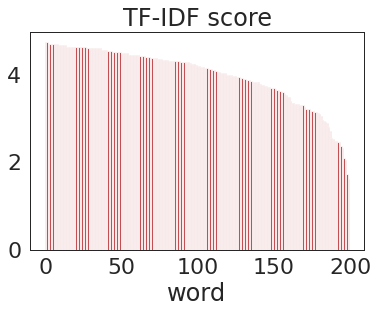

In [69]:
idf_score = tfidf.idf_
idf_sort = np.argsort(idf_score)[::-1]

plt.figure()
plt.xlabel('word')
plt.title("TF-IDF score")
plt.bar(range(200), idf_score[idf_sort],
       color="r",align="center")
plt.xlim([-1, x.shape[1]])
feature_score = []
for order in idf_sort:
    feature_score.append(features[order])

In [ ]:
!pip install sklearn

In [36]:
import sklearn
from sklearn.model_selection import train_test_split

In [38]:
seed = 10
test_size = 0.2
y = subdata_2['encoded_winevariety']
X = subdata_2.drop(['encoded_winevariety','variety'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=60, n_estimators=50, learning_rate=0.05)

In [39]:
clf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.05, max_depth=60, n_estimators=50,
              objective='multi:softprob')

In [43]:
y_pred = clf.predict(X_test)
def feat_imp(df, model, n_features):

    d = dict(zip(df.columns, model.feature_importances_))
    ss = sorted(d, key=d.get, reverse=True)
    top_names = ss[0:n_features]
    top_names_decode = [features[item] for item in top_names]
    #print (top_names_decode)

    #plt.figure(figsize=(15,15))
    #plt.title("Feature importances")
    #plt.bar(range(n_features), [d[i] for i in top_names], color="r", align="center")
    #plt.xlim(-1, n_features)
    #plt.xticks(range(n_features), top_names_decode, rotation='vertical')

feat_imp(X_train, clf, 50)

In [44]:
# Medindo a Acuraria do modelo
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 60.08%


In [45]:
### Regressao Logistica  ###
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
C = [0.1,1,5,10,100,1000,10000]
accuracy = []
for c in C:
    model = LogisticRegression(C=c)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # Acuracia
    accuracy.append(accuracy_score(y_pred, y_test))
    
    print("Accuracy: %.2f%%" % (accuracy[-1] * 100.0))

Accuracy: 60.50%
Accuracy: 65.97%
Accuracy: 65.13%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 64.71%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 60.08%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 59.66%
Accuracy: 59.66%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(0.72, 0.75)

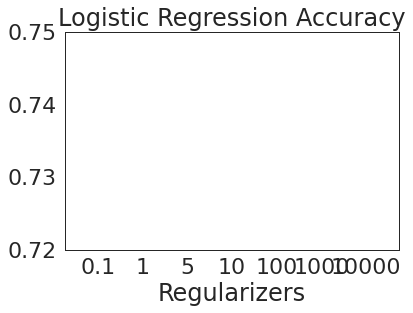

In [67]:
plt.figure()
plt.xlabel('Regularizers')
plt.title("Logistic Regression Accuracy")
plt.plot(accuracy)
plt.bar(range(7), accuracy, color="green", align="center")
plt.xticks(range(7), C)
plt.ylim([0.72,0.75])


In [59]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(max_depth=60, random_state=0,n_estimators=50)

In [60]:
model2.fit(X_train,y_train)

RandomForestClassifier(max_depth=60, n_estimators=50, random_state=0)

In [61]:
y_pred = model2.predict(X_test)
# Medindo a Acuracia
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_pred, y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 61.76%


Feature ranking:
1. feature 8 (0.034848)
2. feature 195 (0.033989)
3. feature 23 (0.031206)
4. feature 141 (0.027532)
5. feature 177 (0.025152)
6. feature 29 (0.023608)
7. feature 35 (0.021734)
8. feature 78 (0.020857)
9. feature 33 (0.020845)
10. feature 174 (0.017862)
11. feature 81 (0.016298)
12. feature 9 (0.015919)
13. feature 20 (0.014270)
14. feature 154 (0.013862)
15. feature 115 (0.013623)
16. feature 155 (0.013072)
17. feature 103 (0.013058)
18. feature 30 (0.011605)
19. feature 74 (0.011539)
20. feature 134 (0.011358)
21. feature 128 (0.011350)
22. feature 3 (0.011328)
23. feature 136 (0.010522)
24. feature 87 (0.010085)
25. feature 15 (0.010078)
26. feature 38 (0.009827)
27. feature 62 (0.009275)
28. feature 151 (0.008771)
29. feature 22 (0.008576)
30. feature 124 (0.008560)
31. feature 36 (0.008517)
32. feature 148 (0.008334)
33. feature 140 (0.007792)
34. feature 135 (0.007770)
35. feature 80 (0.007290)
36. feature 180 (0.007224)
37. feature 197 (0.007086)
38. feature 143

<Figure size 432x288 with 0 Axes>

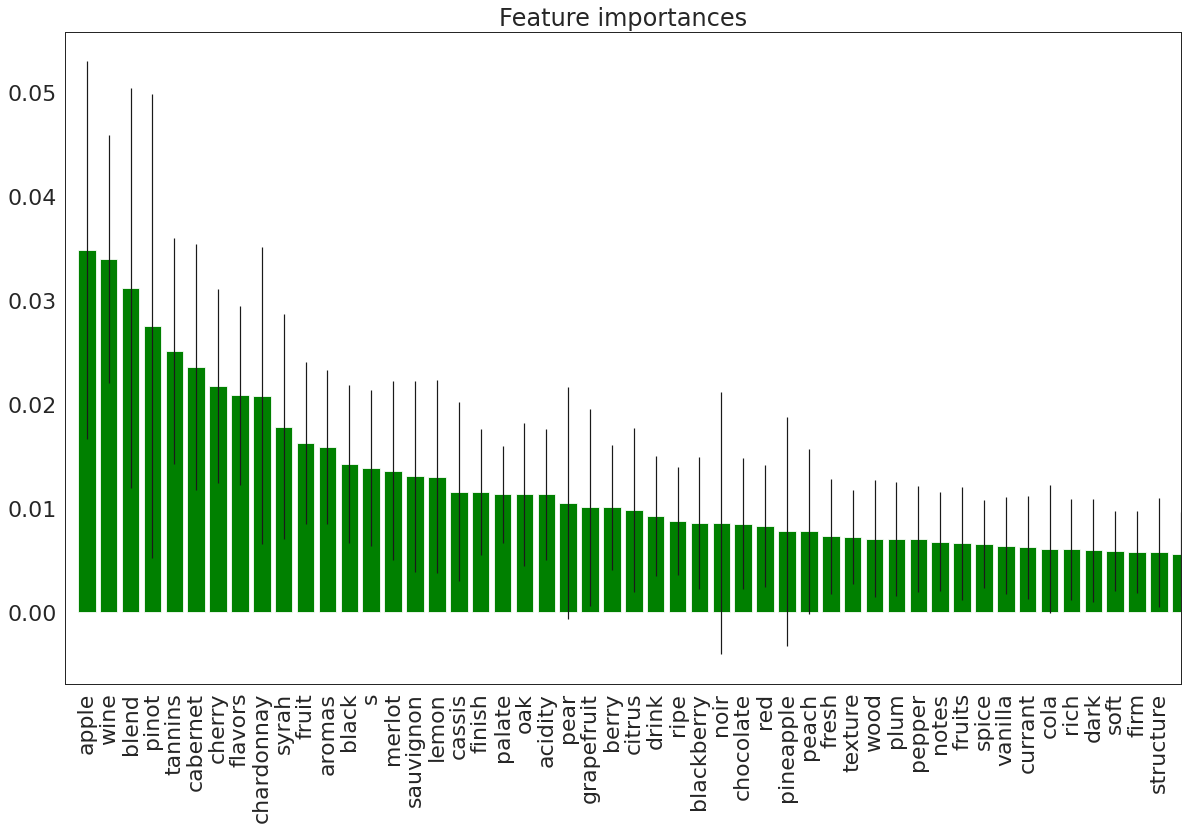

In [66]:
importances = model2.feature_importances_
std = np.std([tree.feature_importances_ for tree in model2.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.figure(figsize=(20,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="green", yerr=std[indices], align="center")
plt.xticks(range(50), feature_importance, rotation='vertical')
plt.xlim([-1, 50])
#plt.xlim([-1, X.shape[1]])
plt.show()

In [52]:
feature_importance = []
for item in indices:
    feature_importance.append(features[item])
    
print (feature_importance)

['apple', 'wine', 'blend', 'pinot', 'tannins', 'cabernet', 'cherry', 'flavors', 'chardonnay', 'syrah', 'fruit', 'aromas', 'black', 's', 'merlot', 'sauvignon', 'lemon', 'cassis', 'finish', 'palate', 'oak', 'acidity', 'pear', 'grapefruit', 'berry', 'citrus', 'drink', 'ripe', 'blackberry', 'noir', 'chocolate', 'red', 'pineapple', 'peach', 'fresh', 'texture', 'wood', 'plum', 'pepper', 'notes', 'fruits', 'spice', 'vanilla', 'currant', 'cola', 'rich', 'dark', 'soft', 'firm', 'structure', 'light', 'raspberry', 'nose', 'dry', 'cherries', 'green', 'bodied', 'vineyard', 'good', 'cranberry', 'tobacco', 'crisp', 'shows', 'toast', 'tart', 'strawberry', 'dense', 'herb', 'alongside', 'coffee', 'sweet', 'clean', 'dried', 'meat', 'juicy', 'creamy', 'bit', 'blackberries', 'blueberry', 'tannic', 'balanced', 'offers', 'bottling', 'solid', 'new', 'slightly', 'feel', 'like', 'barrel', 'flavor', '100', 'little', 'earthy', 'fruity', 'herbs', 'touch', 'style', 'bright', 'currants', 'savory', 'character', 'smok

Accuracy: 18.49%
Accuracy: 23.95%
Accuracy: 41.18%
Accuracy: 41.60%
Accuracy: 44.54%
Accuracy: 46.64%
Accuracy: 37.39%
Accuracy: 44.54%
Accuracy: 42.02%
Accuracy: 42.02%
Accuracy: 42.02%
Accuracy: 42.02%
Accuracy: 42.02%


(0.15, 0.8)

<Figure size 432x288 with 0 Axes>

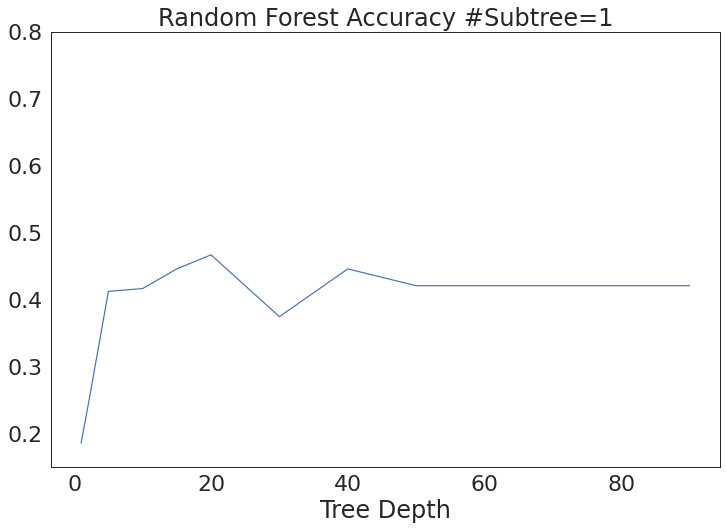

In [54]:
# Random Forest
Depth = [1,2,5,10,15,20,30,40,50,60,70,80,90]
accuracy = []
for c in Depth:
    model2 = RandomForestClassifier(max_depth=c, random_state=0,n_estimators=1)
    model2.fit(X_train,y_train)
    y_pred = model2.predict(X_test)
    #Measuring accuracy
    accuracy.append(accuracy_score(y_pred, y_test))
    print("Accuracy: %.2f%%" % (accuracy[-1] * 100.0))
    
plt.figure()
plt.figure(figsize=(12,8))
plt.xlabel('Tree Depth')
plt.title("Random Forest Accuracy #Subtree=1")
plt.plot(Depth,accuracy)
plt.ylim([0.15,0.8])